# 数据集处理

## 数据集1： PICO-CORPUS
 1,011 篇 PubMed 摘要 参与者、干预、控制和结果（PICO 元素） BRAT （https://brat.nlplab.org/）<br>
1.统计层次标签的缩写
2.标签和实体转换
3.nct抽取



 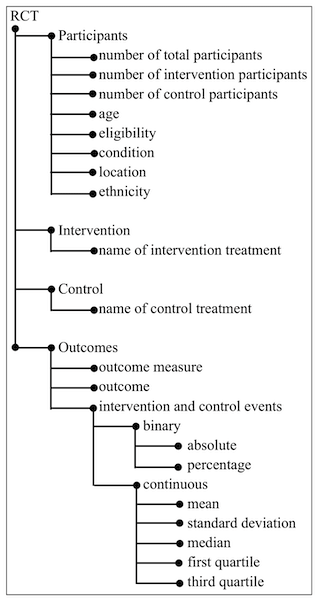

#### 数据集标签检查

In [ ]:
"""检查所有的类别及数据集中的标记"""
import os
import pandas as pd
import re

def collect_unique_values_from_ann(folder_path):
    unique_values = set()  # 用于存储唯一值
    for filename in os.listdir(folder_path):
        if filename.endswith('.ann'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    columns = line.strip().split()
                    if len(columns) > 1:  # 确保行中至少有两列
                        unique_values.add(columns[1])  # 添加第二列的值到集合
    return unique_values
    

def extract_nct_numbers(folder_path):
    nct_numbers = set() 
    nct_pattern = r"NCT\d{8}"
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                matches = re.findall(nct_pattern, text)
                nct_numbers.update(matches)  
    return nct_numbers

folder_path = "/local/home/sumyao/ysmpubmed/otherauthor/PICO-Corpus-main/pico_corpus_brat_annotated_files"
unique_values = collect_unique_values_from_ann(folder_path)
nct_numbers = extract_nct_numbers(folder_path)

print(unique_values)
print(len(list(nct_numbers)))

#### 格式转换

In [3]:
import re
import json

# 读取ANN文件的函数
def read_ann_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()

# 解析 ANN 文件的函数
def parse_ann_file(ann_lines):
    parsed_data = {
        "participants": [],
        "intervention": [],
        "control": [],
        "outcomes": []
    }
    
    for line in ann_lines:
        parts = line.strip().split('\t')
        entity_type = parts[1].split()[0]
        entity_value = parts[2]
        
        # 根据层次结构将子类别映射到父类别
        if entity_type in ["total-participants",
                            "intervention-participants",
                            "control-participants",
                            "age",
                            "eligibility", 
                            "condition",
                            "location",
                            "ethnicity"]  :
            parsed_data["participants"].append(entity_value)
        elif entity_type in ["intervention"]:
            parsed_data["intervention"].append(entity_value)
        elif entity_type in ["control"]:
            parsed_data["control"].append(entity_value)
        elif entity_type in ["outcome-Measure",
                            "outcome",
                            'cv-bin-abs',
                            'cv-bin-percent',
                            'cv-cont-mean',
                            'cv-cont-median',
                            'cv-cont-q1',
                            'cv-cont-q3',
                            'cv-cont-sd',
                            'iv-bin-abs',
                            'iv-bin-percent',
                            'iv-cont-mean',
                            'iv-cont-median',
                            'iv-cont-q1',
                            'iv-cont-q3',
                            'iv-cont-sd']:
            parsed_data["outcomes"].append(entity_value)
            #print(parsed_data.get("outcomes",""))
            #parsed_data["outcomes"]=" ".join(parsed_data.get("outcomes",""))
    #print(parsed_data.get("outcomes",""))
    """
    parsed_data["participants"]=" ".join(parsed_data.get("participants",""))
    parsed_data["intervention"]=" ".join(parsed_data.get("intervention",""))
    parsed_data["control"]=" ".join(parsed_data.get("control",""))
    parsed_data["outcomes"]=" ".join(parsed_data.get("outcomes",""))"""
    return parsed_data



### 重写
import re
import json

# 读取ANN文件的函数
def read_ann_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()

# 解析 ANN 文件的函数
def parse_ann_file(ann_lines):
    parsed_data = {
        "participants": [],
        "intervention": [],
        "control": [],
        "outcomes": []
    }
    
    for line in ann_lines:
        parts = line.strip().split('\t')
        entity_type = parts[1].split()[0]
        entity_value = parts[2]
        
        # 根据层次结构将子类别映射到父类别
        if entity_type in ["total-participants",
                            "intervention-participants",
                            "control-participants",
                            "age",
                            "eligibility", 
                            "condition",
                            "location",
                            "ethnicity"]  :
            parsed_data["participants"].append(entity_value)
        elif entity_type in ["intervention"]:
            parsed_data["intervention"].append(entity_value)
        elif entity_type in ["control"]:
            parsed_data["control"].append(entity_value)
        elif entity_type in ["outcome-Measure",
                            "outcome",
                            'cv-bin-abs',
                            'cv-bin-percent',
                            'cv-cont-mean',
                            'cv-cont-median',
                            'cv-cont-q1',
                            'cv-cont-q3',
                            'cv-cont-sd',
                            'iv-bin-abs',
                            'iv-bin-percent',
                            'iv-cont-mean',
                            'iv-cont-median',
                            'iv-cont-q1',
                            'iv-cont-q3',
                            'iv-cont-sd']:
            parsed_data["outcomes"].append(entity_value)
            #print(parsed_data.get("outcomes",""))
            #parsed_data["outcomes"]=" ".join(parsed_data.get("outcomes",""))
    #print(parsed_data.get("outcomes",""))
    
    parsed_data["participants"]=" ".join(parsed_data.get("participants",""))
    parsed_data["intervention"]=" ".join(parsed_data.get("intervention",""))
    parsed_data["control"]=" ".join(parsed_data.get("control",""))
    parsed_data["outcomes"]=" ".join(parsed_data.get("outcomes",""))
    return parsed_data


In [ ]:
# demo:从文件中读取数据并解析
file_path = "/local/home/sumyao/ysmpubmed/otherauthor/PICO-Corpus-main/pico_corpus_brat_annotated_files/8523049.ann"  # 替换为实际文件路径
ann_lines = read_ann_file(file_path)
parsed_data = parse_ann_file(ann_lines)
parsed_data

In [5]:
import os
import json

# 读取txt文件内容
def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().strip()
    return content

# 整合txt和ann文件内容
def integrate_data(folder_path):
    data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            pmid = file_name.replace('.txt', '')
            txt_path = os.path.join(folder_path, f"{pmid}.txt")
            ann_path = os.path.join(folder_path, f"{pmid}.ann")
            
            if os.path.exists(txt_path) and os.path.exists(ann_path):
                txt_content = read_txt_file(txt_path)
                ann_lines = read_ann_file(ann_path)
                label_data = parse_ann_file(ann_lines)
                
                entry = {
                    "pmid":pmid,
                    "content": txt_content,
                    "label": label_data
                }
                data.append(entry)
    return data

# 主函数
def main():
    folder_path = '/local/home/sumyao/ysmpubmed/otherauthor/PICO-Corpus-main/pico_corpus_brat_annotated_files'
    data = integrate_data(folder_path)
    
    # 输出到JSON文件
    with open('/local/home/sumyao/YSforGIT/dataset/picocorpus_1formatransfered_contentlabel.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

if __name__ == '__main__':
    main()


### 模拟检索过程

In [ ]:
def extract_nct_number(abstract):
    nct_pattern = re.compile(r"NCT\d{8}")
    nct_match = nct_pattern.search(abstract)
    nct_number = nct_match.group(0) if nct_match else 'N/A'
    return nct_number

## 数据集2： Section-Specific

### 参数

In [ ]:
sectionspecific_dir="/Users/ysm/Library/CloudStorage/OneDrive-个人/datasets/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data"
sectionspecific_output_dir='/Users/ysm/Library/CloudStorage/OneDrive-个人/datasets/PICO_SectionSpecific/output/'

### 转换QA格式，提取titles

#### 数据转换

In [74]:

def extract_labels(text):
    tokens = re.split(r'\t|\n', text.strip())
    result = {
        "participants": [],
        "interventions": [],
        "comparator": [],
        "outcomes": []
    }
    current_label = None
    current_words = []
    for i in range(0, len(tokens), 2):
        word = tokens[i]
        label = tokens[i+1]
        if label.startswith('B-'):
            if current_label:
                result[current_label].append(' '.join(current_words))
            current_label = label.split('-')[-1].lower()
            current_words = [word]
        elif label.startswith('I-'):
            current_words.append(word)
        else:
            if current_label:
                result[current_label].append(' '.join(current_words))
            current_label = None
            current_words = []
            
    if current_label:
        result[current_label].append(' '.join(current_words))
    return result



import os
import json
"""
* 作者用了五折交叉验证，所以最后的文件会有重复的,构建除重函数
* return不能用在for循环内部,否则只返回第一条
* 使用全局变量，最好作为函数的参数用来维护函数
"""

bio_annotation_dict = {
    0: 'O',
    1: 'B-P',
    1: 'I-P',
    2: 'B-I',
    2: 'I-I',
    4: 'B-O',
    4: 'I-O',
    3: 'B-C',
    3: 'I-C'
    # 可以继续添加更多的条目
}
label2id = {label: idx for idx, label in bio_annotation_dict.items()}
bio_annotation_list= list(bio_annotation_dict.values())


def process_file(file_path, label2id):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    #1.该文件论文总数
    docstart_lines = []
    for i, line in enumerate(lines):
        if line.startswith('-DOCSTART-'):
            docstart_lines.append(i + 1)  # 行号从1开始，所以需要+1
    print("{}有{}个papers".format(file_path,len(docstart_lines)))

    # 2.每篇论文细节抽取
    datas = []
    for start in range(len(docstart_lines)):
        texts = []
        ner_tags = []
        label= {
                "participants": "",
                "interventions":"",
                "comparator": "",
                "outcomes": ""
            }
        # 处理每个paper的行

        if start < len(docstart_lines) - 1:
            para = lines[docstart_lines[start]:docstart_lines[start + 1]]
        else:
            para = lines[docstart_lines[start]:]

        for line in para:
            if len(line.strip()) > 1:  # 非空行
                parts = line.strip().split('\t')
                if len(parts) == 2:  # 确保每行有两列
                    word, tag = parts
                    texts.append(word)
                    #ner_tags.append(tag)
                    if tag in ['B-P','I-P']:
                        label["participants"]+=' '+word
                    elif tag in['B-I','I-I']:
                        label["interventions"]+=' '+word
                    elif tag in ['B-C','I-C']:
                        label["comparator"]+=' '+word
                    elif tag in ['B-O','I-O']:
                        label["outcomes"]+=' '+word
                #else:
                    #print(f"Ignoringlinewithincorrectformat: {line}")
        data = {
                #"id": start,
                "content": " ".join(texts),
                #"ner_tags": ners,
                "label":label
            }
        datas.append(data)
    return datas  #跳出for循环外，否则只返回最后一个
              
def convert_to_json(data_dir,output_file): #每个数据集的处理
    folder_names = ['fold1'] #因为是五折，所以每个fold都一样
    split_names = ['train', 'dev', 'test']
    
    json_data = []
    for folder_name in folder_names:
        folder_data = []
        for split_name in split_names:
            file_path = os.path.join(data_dir, folder_name, split_name + '.txt')
            if os.path.exists(file_path):
                data= process_file(file_path,label2id)
                if data:
                    json_data.extend(data)
                else:
                    print(f"No data returned from file: {file_path}")
            #else:
                #print(f"File not found: {file_path}")
    return json_data

def deduplicate_dicts(list_of_dicts):
    seen = set()
    result = []
    for d in list_of_dicts:
        key = (tuple(d['content']), tuple(d['label']))
        if key not in seen:
            seen.add(key)
            result.append(d)
    return result


## 🏪三个子文件并除重
datasets=[]
for datapath in ['AD','COVID-19','EBM-NLPmod']:
    data_dir = sectionspecific_dir+'/{}'.format(datapath)  # 替换为您的数据文件夹路径
    data=convert_to_json(data_dir,sectionspecific_output_dir+"SectionSpecific_sonClass_{}.json".format(datapath)) ##是否生成子文件
    datasets.extend(data)

print("未删除重复前的total",len(datasets))
datasets=deduplicate_dicts(datasets)
print("删除重复后的total",len(datasets))

output_file = sectionspecific_output_dir+"SectionSpecific_1.formatChanged_absPICO.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(datasets, f, ensure_ascii=False, indent=4)

/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data/AD/fold1/train.txt有120个papers
/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data/AD/fold1/dev.txt有15个papers
/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data/AD/fold1/test.txt有15个papers
/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data/COVID-19/fold1/train.txt有120个papers
/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data/COVID-19/fold1/dev.txt有15个papers
/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_annotation_of_PICO-main/data/COVID-19/fold1/test.txt有15个papers
/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_SectionSpecific/section_specific_a

#### 数据清洗

In [77]:
"""*******提取题目和摘要，清洗数据**********"""
def extract_titles_idx(data, output_file):
    
    extracted_titles = []
    extrected_idx=[]
    error_results = []

    for idx, item in enumerate(data):
        text_list = item.get('content', [])
        # 检查是否同时存在"Title"和"METHODS"
        if "Title" in text_list and "METHODS" in text_list:
            title_index = text_list.index("Title")
            methods_index = text_list.index("METHODS")
            
            # 确保"Title"在"METHODS"之前
            if title_index < methods_index - 1:
                title_text = ''.join(text_list[title_index + 1 : methods_index])
                title_text = title_text.strip(':')
                extracted_titles.append(title_text.replace("itle : ", ""))
                extrected_idx.append(idx)
                
            else:
                error_results.append({"index": idx, "content": text_list})
        else:
            error_results.append({"index": idx, "content": text_list})
        # 查看提取结果和错误记录
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(extracted_titles, f, ensure_ascii=False, indent=4)
    print("有method摘要和Title的出版物",len(extracted_titles))
    print("无method摘要出版物",len(error_results))
    
    #for error in error_results:
        #print("Error Results:", error)
    return extrected_idx

extrected_idx=extract_titles_idx(data=datasets, output_file=sectionspecific_output_dir+"sectionspecific_2.FilteredbyAbstract_titles.json")


有method摘要和Title的出版物 719
无method摘要出版物 81


#### fcgi接口(失败)
重新抓取titles+abstrct--->pmid,nctnumber

In [50]:
"""*********-----重新抓取摘要以抽取pubmed的nctNUMBER-------********"""
from xml.etree import ElementTree
import requests
import re
import json
from tqdm import tqdm
"""
tqdm库的使用 打印处理进度
"""

## 加载titels文件 读取tiles
# Function to search for a PubMed ID based on the title
def search_pubmed(title):
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "pubmed",
        "term": title,
        "retmode": "xml"
    }
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    # Parse XML response
    root = ElementTree.fromstring(response.content)
    id_list = root.find("IdList")
    pmid = id_list.find("Id").text if id_list.find("Id") is not None else None
    return pmid

# Function to fetch details of a PubMed article based on PMID
def fetch_pubmed_details(pmid):
    try:
        base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
        params = {
            "db": "pubmed",
            "id": pmid,
            "retmode": "xml"
        }
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        # Parse XML response
        root = ElementTree.fromstring(response.content)
        article = root.find(".//PubmedArticle")
        if article is None:
            raise ValueError(f"PubMed article not found for PMID: {pmid}")
        title_elem = article.find(".//ArticleTitle")
        title = title_elem.text.strip() if title_elem is not None else 'N/A'
        abstract_elem = article.find(".//AbstractText")
        abstract = abstract_elem.text.strip() if abstract_elem is not None else 'N/A'
        return title, abstract
    
    except Exception as e:
        print(f"Error fetching PubMed details for PMID {pmid}: {str(e)}")
        return 'N/A', 'N/A'


results = []
import pandas as pd
df=pd.read_excel("/Users/ysm/Desktop/RAG/sectionspecific_titles_humanfindPMID.xlsx", sheet_name='sheet1',header=None)
pmids=df.iloc[:, 1].tolist()

results = []
for pmid, idx in tqdm(zip(pmids, extrected_idx), desc="scrawling abstracts", unit="title"):
    fetched_title, abstract = fetch_pubmed_details(pmid)
    datasets[idx]["idxin800"]=idx
    datasets[idx]["pmid"]=pmid
    datasets[idx]["title"]=fetched_title
    datasets[idx]["abstract"]=abstract
    results.append( datasets[idx])
with open(sectionspecific_output_dir+"sectionspecific_absPICO_719_pmidAbsTitleAdded.json", "w", encoding="utf-8") as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)  

#### webparser(成功)
爬虫_重新抓取

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

def clean_abstract(text):
    cleaned_text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ') # 去除换行符和制表符
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip() # 去除多余的空格
    return cleaned_text

def webparser_pubmed(pmid):
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.41' 
    } 
    url = f"https://pubmed.ncbi.nlm.nih.gov/{pmid}"
    
    # 正确的代理格式
    proxies = {
        'http': 'http://8.220.204.215:8008',  
        'https': 'https://154.203.132.49:8080'
    }
    
    try:
        # 如果不需要代理，可以去掉proxies参数
        res = requests.get(url, headers=headers, timeout=10)
        
        if res.status_code == 200:
            soup = BeautifulSoup(res.content, 'html.parser')
            
            # 提取 PMID, DOI, 标题, 和摘要
            pmid_value = pmid
            doi = soup.find('a', {'data-ga-category': 'full_text', 'data-ga-action': 'DOI'}).text.strip() if soup.find('a', {'data-ga-category': 'full_text', 'data-ga-action': 'DOI'}) else 'N/A'
            title = soup.find('h1', {'class': 'heading-title'}).text.strip() if soup.find('h1', {'class': 'heading-title'}) else 'N/A'
            abstract = soup.find('div', {'class': 'abstract-content selected'}).text.strip() if soup.find('div', {'class': 'abstract-content selected'}) else 'N/A'
            abstract = clean_abstract(abstract)
            return pmid_value, doi, title, abstract
        else:
            print(f"Failed to fetch page for PMID: {pmid}, Status Code: {res.status_code}")
            return pmid, 'N/A', 'N/A', 'N/A'
    
    except Exception as e:
        print(f"An error occurred while processing PMID: {pmid}, Error: {e}")
        return pmid, 'N/A', 'N/A', 'N/A'
#pmid, doi, title, abstract = webparser_pubmed("33556319") # 示例调用
#print(f"PMID: {pmid1}\nDOI: {doi1}\nTitle: {title1}\nAbstract: {abstract1}") # 输出结果


PMID: 33556319
DOI: 10.1016/S2213-2600(20)30566-X
Title: Peginterferon lambda for the treatment of outpatients with COVID-19: a phase 2, placebo-controlled randomised trial
Abstract: Background: To date, only monoclonal antibodies have been shown to be effective for outpatients with COVID-19. Interferon lambda-1 is a type III interferon involved in innate antiviral responses with activity against respiratory pathogens. We aimed to investigate the safety and efficacy of peginterferon lambda in the treatment of outpatients with mild-to-moderate COVID-19. Methods: In this double-blind, placebo-controlled trial, outpatients with laboratory-confirmed COVID-19 were randomly assigned to a single subcutaneous injection of peginterferon lambda 180 μg or placebo within 7 days of symptom onset or first positive swab if asymptomatic. Participants were randomly assigned (1:1) using a computer-generated randomisation list created with a randomisation schedule in blocks of four. At the time of admini

In [ ]:
results = []
import pandas as pd
df=pd.read_excel("/Users/ysm/Desktop/RAG/sectionspecific_titles_humanfindPMID.xlsx", sheet_name='sheet1',header=None)
pmids=df.iloc[:, 1].tolist()

results = []
for pmid, idx in tqdm(zip(pmids, extrected_idx), desc="scrawling abstracts", unit="pmids"):
    pmid, doi, title, abstract = webparser_pubmed(pmid)
    datasets[idx]["idxin800"]=idx
    datasets[idx]["pmid"]=pmid
    datasets[idx]["title"]=title
    datasets[idx]["abstract"]=abstract
    results.append( datasets[idx])
with open(sectionspecific_output_dir+"sectionspecific_4.webparserTool_719absPICOpmidAbsTitle.json", "w", encoding="utf-8") as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)  

#### 查看有clinicaltrails链接的摘要

In [ ]:
with open(sectionspecific_output_dir+"sectionspecific_4.webparserTool_719absPICOpmidAbsTitle.json", 'r', encoding='utf-8') as file:
    data_all= json.load(file)
#nct_pattern = re.compile(r'NCT\d{8}')
nct_pattern = re.compile(r'NCT\s?\d{8}', re.IGNORECASE)
filtered_records = [record for record in data_all if re.search(nct_pattern, record["abstract"])]
print(len(filtered_records ))
for record in filtered_records:
    if "abstrct" in record:
        del record["abstrct"]

with open(sectionspecific_output_dir+"sectionspecific_5.NCTfilterd_98absPICOpmidAbsTitle.json", "w", encoding="utf-8") as json_file:
    json.dump(filtered_records, json_file, ensure_ascii=False, indent=4)  

## 数据集3： EBM-NLP


In [ ]:

"""*******step1:参数化**********"""
ebm_dataset_args={
    "directory_path":os.getcwd()+"/EBM-NLP/datasets/ebm_nlp_2_00/documents",# 数据集的唯一的pmid号码
    "html_savefolder":os.getcwd()+"/output/"+"EBMhtml/",  #重现抓取的网页保存的地方
    "extractjson_savefilepath":os.getcwd()+"/output/ebm_reparsed_extraced.json",   # 抽取的数据保存路径
    "nctfilted_json_savepath":os.getcwd()+"/output/ebm_2.nctFiltered_doipmidtitleabstract.json"
}

"""1.*************重新抓取************"""
directory_path = ebm_dataset_args.get("directory_path")
save_folder=ebm_dataset_args.get( "html_savefolder")
json_file_path=ebm_dataset_args.get( "extractjson_savefilepath")

def list_unique_files_in_directory(directory):
    items = os.listdir(directory)
    files = {item.replace(".txt", "").replace(".pos", "").replace(".tokens", "") 
             for item in items if os.path.isfile(os.path.join(directory, item))}
    unique_files = list(files)
    return unique_files

PMIDS = list_unique_files_in_directory(directory_path)
#print(PMIDS[0:5])
print("EBM-NLP的标注摘要数量:",len(PMIDS))

#按照PMID抓取标题和摘要https://pubmed.ncbi.nlm.nih.gov/25833107/
item=proxies(IPname='IP_100')
headers={ 'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.41'} 
data_list = []

for pmid in PMIDS:
    url="https://pubmed.ncbi.nlm.nih.gov/{}".format(pmid)
    proxie = random.choice(item) 
    try:
        res = requests.get(url, headers=headers, proxies=proxie)
        if res.status_code == 200:
            soup = BeautifulSoup(res.content, 'html.parser')
            # Extracting pmid, doi, title, and abstract
            pmid_value = pmid
            doi = soup.find('a', {'data-ga-category': 'full_text', 'data-ga-action': 'DOI'}).text.strip() if soup.find('a', {'data-ga-category': 'full_text', 'data-ga-action': 'DOI'}) else 'N/A'
            title = soup.find('h1', {'class': 'heading-title'}).text.strip() if soup.find('h1', {'class': 'heading-title'}) else 'N/A'
            abstract = soup.find('div', {'class': 'abstract-content selected'}).text.strip() if soup.find('div', {'class': 'abstract-content selected'}) else 'N/A'
            """
            print(f"PMID: {pmid_value}")
            print(f"DOI: {doi}")
            print(f"Title: {title}")
            print(f"Abstract: {abstract}")
            """
            # Save the page
            file_path = os.path.join(save_folder, f"{pmid}.html")
            with open(file_path, "wb") as file:
                file.write(res.content)
            data_list.append({
                                "pmid": pmid_value,
                                "doi": doi,
                                "title": title,
                                "abstract": abstract
                            })
        else:
            print(f"Failed to fetch page for PMID: {pmid}")
    except Exception as e:
        print(f"An error occurred while processing PMID: {pmid}, Error: {e}")
with open(json_file_path, "w", encoding="utf-8") as json_file:
    json.dump(data_list, json_file, ensure_ascii=False, indent=4)

"""2.*************数据清洗************"""
import json
import re

input_file_path = ebm_dataset_args.get( "extractjson_savefilepath")
output_file_path =  ebm_dataset_args.get("nctfilted_json_savepath")
with open(input_file_path, 'r') as file:
    papers = json.load(file)

nct_pattern = re.compile(r"NCT\d{8}")
for paper in papers:
    abstract = paper.get("abstract", "")
    nct_number = nct_pattern.search(abstract)
    nct_number = nct_number.group(0) if nct_number else 'N/A'
    paper["nct_number"] = nct_number

filtered_papers = [paper for paper in papers if paper.get("nct_number") != 'N/A']
print("有NCT记录的论文数量为:",len(filtered_papers))
print("有NCT记录的论文比率为:",len(filtered_papers)/len(papers))


# 过滤并转换 nct_number 字段
filtered_papers = []
for paper in papers:
    nct_number = paper.get("nct_number")
    if nct_number and nct_number != 'N/A':
        # 去除开头的0并转换为整数
        paper["nct_number"] = int(nct_number.replace("NCT",""))
        filtered_papers.append(paper)

# 将过滤后的数据写入新的 JSON 文件
with open(output_file_path, 'w', encoding='utf-8') as fp:
    json.dump(filtered_papers, fp, ensure_ascii=False, indent=4)
print(f"Filtered papers have been written to {output_file_path}")

#### 格式转换(失效)

In [93]:
intervention_label_mapping = {
                                0: 'No label',
                                1: 'Surgical',
                                2: 'Physical',
                                3: 'Pharmacological',
                                4: 'Educational',
                                5: 'Psychological',
                                6: 'Other',
                                7: 'Control'
                                }
participants_label_mapping = { 
                                0: 'No label',
                                1: 'Age',
                                2: 'Sex',
                                3: 'Sample-size',
                                4: 'Condition'
                                }
outcomes_label_mapping ={ 
                        0: 'No label',
                        1: 'Physical',
                        2: 'Pain',
                        3: 'Mortality',
                        4: 'Adverse-effects',
                        5: 'Mental',
                        6: 'Other' }

In [ ]:
import os

# Folder paths
base_path = "/Users/ysm/Library/CloudStorage/OneDrive-个人/datastes/PICO_EBM-NLP/EBM-NLP-master/ebm_nlp_2_00"
annotation_path = os.path.join(base_path, "annotations/aggregated/hierarchical_labels")
document_path = os.path.join(base_path, "documents")


# Process a specific category (interventions, participants, outcomes)
def process_category(category, label_mapping, mode):
    """
    if mode == 'train':
        category_path = os.path.join(annotation_path, category, "train")
    elif mode == 'test':
        category_path = os.path.join(annotation_path, category, "test", "gold")

    pmid_results = {}
    
    # Iterate over ann files in the respective folder
    for ann_file in os.listdir(category_path):
        if ann_file.endswith('.ann'):
            pmid = ann_file.split(".AGGREGATED.ann")[0]
            tokens_file = os.path.join(document_path, f"{pmid}.tokens")
            
            # Read tokens
            with open(tokens_file, 'r') as tf:
                tokens = tf.read().splitlines()
            
            # Read annotation labels
            ann_file_path = os.path.join(category_path, ann_file)
            with open(ann_file_path, 'r') as af:
                labels = [int(label) for label in af.read().splitlines()]
            
            # Collect tokens where the label is not 0
            collected_tokens = [tokens[i] for i, label in enumerate(labels) if label != 0]
            
            # Store the result for the current pmid
            if pmid not in pmid_results:
                pmid_results[pmid] = { 'participants': [], 'interventions': [], 'outcomes': [] }
            pmid_results[pmid][category] = collected_tokens
    
    return pmid_results"""

    if mode == 'train':
        category_path = os.path.join(annotation_path, category, "train")
    elif mode == 'test':
        category_path = os.path.join(annotation_path, category, "test", "gold")

    pmid_results = {}
    
    # Iterate over ann files in the respective folder
    for ann_file in os.listdir(category_path):
        if ann_file.endswith('.ann'):
            pmid = ann_file.split(".AGGREGATED.ann")[0]
            tokens_file = os.path.join(document_path, f"{pmid}.tokens")
            
            # Read tokens
            with open(tokens_file, 'r') as tf:
                tokens = tf.read().splitlines()
            
            # Read annotation labels
            ann_file_path = os.path.join(category_path, ann_file)
            
            # Check if the .ann file is empty
            if os.stat(ann_file_path).st_size == 0:
                print(f"Skipping empty file: {ann_file_path}")
                continue  # Skip processing if the file is empty
            
            with open(ann_file_path, 'r') as af:
                labels = [int(label) for label in af.read().splitlines()]
            
            # Collect tokens where the label is not 0
            collected_tokens = [tokens[i] for i, label in enumerate(labels) if label != 0]
            
            # Store the result for the current pmid
            if pmid not in pmid_results:
                pmid_results[pmid] = { 'participants': [], 'interventions': [], 'outcomes': [] }
            pmid_results[pmid][category] = collected_tokens
    
    return pmid_results
# Process each category for both train and test modes
def process_all_data():
    participants_data_train = process_category('participants', participants_label_mapping, 'train')
    interventions_data_train = process_category('interventions', intervention_label_mapping, 'train')
    outcomes_data_train = process_category('outcomes', outcomes_label_mapping, 'train')
    
    participants_data_test = process_category('participants', participants_label_mapping, 'test')
    interventions_data_test = process_category('interventions', intervention_label_mapping, 'test')
    outcomes_data_test = process_category('outcomes', outcomes_label_mapping, 'test')

    # Merge the train and test data into a final structure per PMID
    final_results = {}

    def merge_data(participants_data, interventions_data, outcomes_data):
        for pmid in participants_data:
            if pmid not in final_results:
                final_results[pmid] = {
                    'participants': [],
                    'interventions': [],
                    'outcomes': []
                }
            final_results[pmid]['participants'] += participants_data[pmid].get('participants', [])
            final_results[pmid]['interventions'] += interventions_data[pmid].get('interventions', [])
            final_results[pmid]['outcomes'] += outcomes_data[pmid].get('outcomes', [])

    merge_data(participants_data_train, interventions_data_train, outcomes_data_train)
    merge_data(participants_data_test, interventions_data_test, outcomes_data_test)
    return final_results

# Output the final results
final_results = process_all_data()
print(final_results)

#### 1.一个版本：participants是细粒度；其他是一个层次的

In [ ]:
import os
import json
import csv

def read_files(folder_path):
    """
    Reads all files from the given folder and returns a dictionary with filename (without extension) as keys and file content as values.
    """
    file_contents = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.AGGREGATED.ann'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                pmid = filename.split('.')[0]
                file_contents[pmid] = file.read()
    return file_contents

def read_text_files(folder_path):
    """
    Reads all text files from the given folder and returns a dictionary with filename (without extension) as keys and file content as values.
    """
    text_contents = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.tokens'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                pmid = filename.split('.')[0]
                text_contents[pmid] = file.read()
    return text_contents

def interventions(ebm_datasets_root):
    simple_input_path = "interventions"
    label_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/train'.format(simple_input_path)
    label_data = read_files(label_folder_path)

    label_test_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/test/gold'.format(simple_input_path)
    label_test_data = read_files(label_test_folder_path)

    text_folder_path =ebm_datasets_root+ 'EBM-NLP/datasets/ebm_nlp_2_00/documents'
    text_data = read_text_files(text_folder_path)

    intervention_list = []
    
    for key in text_data.keys():
        chars = ''  # 在每个键的循环中清空chars
        if key in label_data:  # 确保 key 在 label_data 中存在
            text = text_data[key].replace("\n", " ")  # 将换行符替换为空格
            labels = label_data[key].split("\n")  # 将标签按行分割成列表
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char
        elif key in label_test_data:  # 如果在测试数据中存在
            text = text_data[key].replace("\n", " ")
            labels = label_test_data[key].split("\n")
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char

        d = {'id': key, 'Intervention': chars}
        intervention_list.append(d)
    
    return intervention_list

def outcomes(ebm_datasets_root):
    simple_input_path = "outcomes"
    label_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/train'.format(simple_input_path)
    label_data = read_files(label_folder_path)

    label_test_folder_path =ebm_datasets_root+ 'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/test/gold'.format(simple_input_path)
    label_test_data = read_files(label_test_folder_path)

    text_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/documents'
    text_data = read_text_files(text_folder_path)

    outcomes_list = []
    
    for key in text_data.keys():
        chars = ''  # 在每个键的循环中清空chars
        if key in label_data:  # 确保 key 在 label_data 中存在
            text = text_data[key].replace("\n", " ")  # 将换行符替换为空格
            labels = label_data[key].split("\n")  # 将标签按行分割成列表
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char
        elif key in label_test_data:  # 如果在测试数据中存在
            text = text_data[key].replace("\n", " ")
            labels = label_test_data[key].split("\n")
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char

        d = {'id': key, 'Intervention': chars}
        outcomes_list.append(d)
    
    return outcomes_list

def participants(ebm_datasets_root):
    simple_input_path = "participants"
    label_folder_path =ebm_datasets_root+ 'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/train'.format(simple_input_path)
    label_data = read_files(label_folder_path)

    label_test_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/test/gold'.format(simple_input_path)
    label_test_data = read_files(label_test_folder_path)

    text_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/documents'
    text_data = read_text_files(text_folder_path)

    participants_list = []
    print("textkeys:", len(text_data.keys()))

    for key in text_data.keys():
        gender, age, samplesize, condition = "", "", "", ""

        if key in label_data:  # 确保 key 在 label_data 中存在
            text = text_data[key].replace("\n", " ")  # 将换行符替换为空格
            labels = label_data[key].split("\n")  # 将标签按行分割成列表

            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) == 1:
                    age += ' ' + char
                elif int(label) == 2:
                    gender += ' ' + char
                elif int(label) == 3:
                    samplesize += ' ' + char
                elif int(label) == 4:
                    condition += ' ' + char

        elif key in label_test_data:  # 如果在测试数据中存在
            text = text_data[key].replace("\n", " ")
            labels = label_test_data[key].split("\n")

            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) == 1:
                    age += ' ' + char
                elif int(label) == 2:
                    gender += ' ' + char
                elif int(label) == 3:
                    samplesize += ' ' + char
                elif int(label) == 4:
                    condition += ' ' + char

        # 只有在 label_data 或 label_test_data 中存在时才添加到 participants_list
        d = {"id":key,"age": age, "gender": gender, "samplesize": samplesize, "condition": condition}
        participants_list.append(d)
    return participants_list



In [ ]:
import sys
csv.field_size_limit(sys.maxsize)
args={"ebm_reparsed_dir":"/local/home/sumyao/ysmpubmed/DATASET/EBMHugging/EBM_HTML_PARSER_with_NCT.json",
      "ebm_datasets_root":"/local/home/sumyao/ysmpubmed/otherauthor/",
      "ebm_merged_dir":"merged_ebm.txt",
      "nct_file_path":"/local/home/sumyao/ysmpubmed/DATASET/clinicaltrials.csv",
      'ebm_auged_merged_dir':"merged_auged_ebm.txt"}

def load_nct_data(file_path):
    nct_data = {}
    with open(file_path, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            nct_number = row['NCT Number']
            aug_content = f"{row['Study Title']} {row['Acronym']} {row['Brief Summary']} {row['Study Results']} {row['Conditions']} {row['Interventions']} {row['Primary Outcome Measures']} {row['Sex']} {row['Age']}"
            nct_data[nct_number] = aug_content
    return nct_data

def merge_ebm(args):
      first_data = json.load(open(args.get("ebm_reparsed_dir"), 'r'))
      second_dict =  {item['id']: item for item in interventions(args.get("ebm_datasets_root"))} 
      third_dict = {item['id']: item for item in outcomes(args.get("ebm_datasets_root"))} 
      fourth_dict = {item['id']: item for item in participants(args.get("ebm_datasets_root"))} 

      nct_data=load_nct_data(args.get("nct_file_path"))
      # 创建最终数据结构
      merged_data = []
      aug_datas=[]
      for item in first_data:
            pmid = item['pmid']
            nct_number = item.get('nct_number', '')
            aug_content = nct_data.get(nct_number, '')
            
            title = item['title']
            abstract = item['abstract']

            id = pmid
            intervention = second_dict.get(id, {}).get('Intervention', '')
            Outcomes = third_dict.get(id, {}).get('Intervention', '')
            participant_data = fourth_dict.get(id, {'age': '', 'gender': '', 'samplesize': '', 'condition': ''})
            
            # 创建新的数据结构
            new_data = {
            'pmid': pmid,
            'nctnumber': nct_number if nct_number != 'N/A' else '',
            'content': f"{title} ' '{abstract}",
            'label': {
                  'Age': participant_data.get('age', ''),
                  'Gender': participant_data.get('gender', ''),
                  'samplesize': participant_data.get('samplesize', ''),
                  'Conditions': participant_data.get('condition', ''),
                  'Intervention': intervention,
                  'Outcomes': Outcomes
            }
            }
            
            merged_data.append(new_data)
            if nct_number != 'N/A':
                  aug_data={
                        'pmid': pmid,
                        'nctnumber': nct_number if nct_number != 'N/A' else '',
                        'content': f"{title}' ' {abstract}",
                        'aug_content': aug_content,
                        'label': {
                              'Age': participant_data.get('age', ''),
                              'Gender': participant_data.get('gender', ''),
                              'samplesize': participant_data.get('samplesize', ''),
                              'Conditions': participant_data.get('condition', ''),
                              'Intervention': intervention,
                              'Outcomes': Outcomes
                        },
                  }
                  aug_datas.append(aug_data)
      with open(args.get("ebm_merged_dir"),"w") as f:
            json.dump(merged_data,f)
      with open(args.get('ebm_auged_merged_dir'),"w") as f:
            json.dump(aug_datas,f)
      return merged_data,aug_datas


ebm,ebm2=merge_ebm(args)


#### 2.第二个版本PIO顶层元素

In [2]:
def participants(ebm_datasets_root):
    simple_input_path = "participants"
    label_folder_path = ebm_datasets_root + 'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/train'.format(simple_input_path)
    label_data = read_files(label_folder_path)

    label_test_folder_path = ebm_datasets_root + 'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/test/gold'.format(simple_input_path)
    label_test_data = read_files(label_test_folder_path)

    text_folder_path = ebm_datasets_root + 'EBM-NLP/datasets/ebm_nlp_2_00/documents'
    text_data = read_text_files(text_folder_path)

    participants_list = []
    print("textkeys:", len(text_data.keys()))

    for key in text_data.keys():
        participants = ""  # 初始化合并的Participants字符串

        if key in label_data:  # 确保 key 在 label_data 中存在
            text = text_data[key].replace("\n", " ")  # 将换行符替换为空格
            labels = label_data[key].split("\n")  # 将标签按行分割成列表

            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    participants += ' ' + char  # 将所有不为0的标签字符添加到Participants字符串中

        elif key in label_test_data:  # 如果在测试数据中存在
            text = text_data[key].replace("\n", " ")
            labels = label_test_data[key].split("\n")

            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    participants += ' ' + char

        # 将合并后的 Participants 字符串添加到列表中
        d = {"id": key, "Participants": participants.strip()}
        participants_list.append(d)

    return participants_list
    
def interventions(ebm_datasets_root):
    simple_input_path = "interventions"
    label_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/train'.format(simple_input_path)
    label_data = read_files(label_folder_path)

    label_test_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/test/gold'.format(simple_input_path)
    label_test_data = read_files(label_test_folder_path)

    text_folder_path =ebm_datasets_root+ 'EBM-NLP/datasets/ebm_nlp_2_00/documents'
    text_data = read_text_files(text_folder_path)

    intervention_list = []
    
    for key in text_data.keys():
        chars = ''  # 在每个键的循环中清空chars
        if key in label_data:  # 确保 key 在 label_data 中存在
            text = text_data[key].replace("\n", " ")  # 将换行符替换为空格
            labels = label_data[key].split("\n")  # 将标签按行分割成列表
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char
        elif key in label_test_data:  # 如果在测试数据中存在
            text = text_data[key].replace("\n", " ")
            labels = label_test_data[key].split("\n")
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char

        d = {'id': key, 'Intervention': chars}
        intervention_list.append(d)
    
    return intervention_list

def outcomes(ebm_datasets_root):
    simple_input_path = "outcomes"
    label_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/train'.format(simple_input_path)
    label_data = read_files(label_folder_path)

    label_test_folder_path =ebm_datasets_root+ 'EBM-NLP/datasets/ebm_nlp_2_00/annotations/aggregated/hierarchical_labels/{}/test/gold'.format(simple_input_path)
    label_test_data = read_files(label_test_folder_path)

    text_folder_path = ebm_datasets_root+'EBM-NLP/datasets/ebm_nlp_2_00/documents'
    text_data = read_text_files(text_folder_path)

    outcomes_list = []
    
    for key in text_data.keys():
        chars = ''  # 在每个键的循环中清空chars
        if key in label_data:  # 确保 key 在 label_data 中存在
            text = text_data[key].replace("\n", " ")  # 将换行符替换为空格
            labels = label_data[key].split("\n")  # 将标签按行分割成列表
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char
        elif key in label_test_data:  # 如果在测试数据中存在
            text = text_data[key].replace("\n", " ")
            labels = label_test_data[key].split("\n")
            
            for idx, (char, label) in enumerate(zip(text.split(), labels)):
                if int(label) > 0:
                    chars += ' ' + char

        d = {'id': key, 'Outcomes': chars}
        outcomes_list.append(d)
    
    return outcomes_list


In [3]:
import os
import json
import csv

def read_files(folder_path):
    """
    Reads all files from the given folder and returns a dictionary with filename (without extension) as keys and file content as values.
    """
    file_contents = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.AGGREGATED.ann'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                pmid = filename.split('.')[0]
                file_contents[pmid] = file.read()
    return file_contents

def read_text_files(folder_path):
    """
    Reads all text files from the given folder and returns a dictionary with filename (without extension) as keys and file content as values.
    """
    text_contents = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.tokens'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                pmid = filename.split('.')[0]
                text_contents[pmid] = file.read()
    return text_contents
    
#csv.field_size_limit(sys.maxsize)
args={"ebm_reparsed_dir":"/local/home/sumyao/ysmpubmed/DATASET/EBMHugging/EBM_HTML_PARSER_with_NCT.json",
      "ebm_datasets_root":"/local/home/sumyao/ysmpubmed/otherauthor/",
      "ebm_merged_dir":"/local/home/sumyao/YSforGIT/dataset/ebm_3.PIOformatchanged_contentLabel.json",
      'ebm_auged_merged_dir':"merged_auged_ebm.txt"}


def merge_ebm(args):
      first_data = json.load(open(args.get("ebm_reparsed_dir"), 'r'))
      second_dict =  {item['id']: item for item in interventions(args.get("ebm_datasets_root"))} 
      third_dict = {item['id']: item for item in outcomes(args.get("ebm_datasets_root"))} 
      fourth_dict = {item['id']: item for item in participants(args.get("ebm_datasets_root"))} 

      # 创建最终数据结构
      merged_data = []
      for item in first_data:
            pmid = item['pmid']
            title = item['title']
            abstract = item['abstract']

            id = pmid
            intervention = second_dict.get(id, {}).get('Intervention', '')
            Outcomes = third_dict.get(id, {}).get('Outcomes', '')
            participant_data = fourth_dict.get(id, {}).get('Participants', '')
            
            # 创建新的数据结构
            new_data = {
                        'pmid': pmid,
                        'content': f"{title}. {abstract}",
                        'label': {
                            'participants': participant_data,
                            'interventions': intervention,
                            'outcomes': Outcomes
                                }
                        }
            
            merged_data.append(new_data)
            
      with open(args.get("ebm_merged_dir"),"w") as f:
            json.dump(merged_data,f,indent=4)
      return merged_data

ebm=merge_ebm(args)
ebm[0]

textkeys: 4993


{'pmid': '3260083',
 'content': '[Propofol infusion for the maintenance of short-term anesthesia]. The administration of propofol by infusion for maintenance of anesthesia has attracted much attention recently. We investigated the necessary infusion rate of propofol to maintain anesthesia for short surgical procedures without loss of the evident advantages of this substance. Forty unpremedicated female patients aged 18-59, scheduled for minor gynecological procedures, were randomly assigned to four groups. Anesthesia was induced with 2.0 mg/kg propofol i.v. and simultaneously an infusion of 0.05, 0.10, 0.15, or 0.20 mg propofol/kg per minute was started. The patients were breathing N2O/O2 with FIO2 33%. Additional propofol was administered as a bolus of 10 to 20 mg when the patients moved. With 0.05 mg propofol/kg per minute all patients required additional bolus injections of propofol; with 0.10 mg 8 patients, with 0.15 mg 5 patients, and with 0.20 mg 1 patient required bolus injectio